# 销售数据分析

In [2]:
# 请在此解答
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
sale_data = pd.read_csv("./data/sales_data_month.csv")  
sale_data = sale_data.drop(['customer_id'],axis=1)
sale_data.head()

,date_month,quant_sell
0,2014-01,447
1,2014-01,103
2,2014-01,142
3,2014-01,494
4,2014-01,124


In [3]:
sale_data.describe()

,quant_sell
count,3293.000000
mean,1334.160644
std,2223.056566
min,1.000000
25%,162.000000
50%,645.000000
75%,1538.000000
max,24146.000000


In [4]:
sale_data_bymonth=sale_data.groupby('date_month').sum()

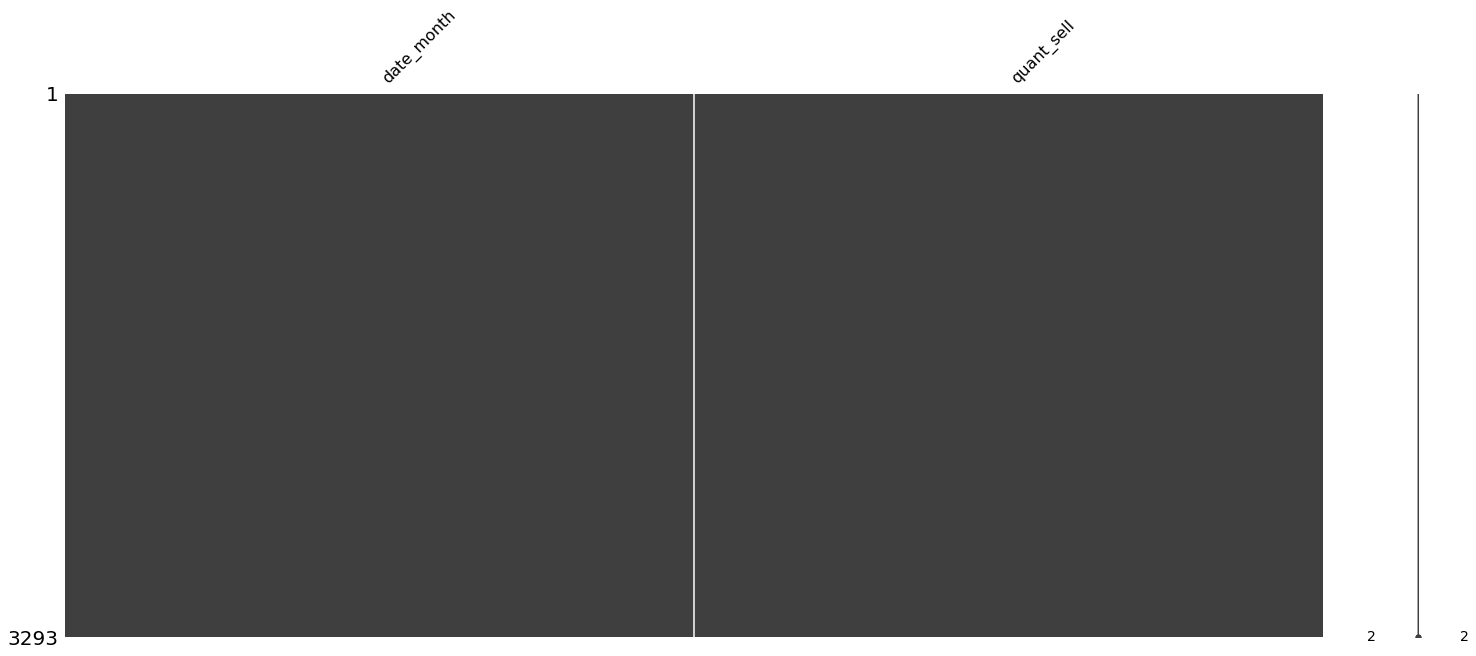

In [5]:
import missingno
missingno.matrix(sale_data)

In [6]:
sale_data_bymonth.describe()

,quant_sell
count,36.000000
mean,122038.638889
std,110322.271896
min,2978.000000
25%,15339.500000
50%,92161.000000
75%,205668.500000
max,377130.000000


In [7]:
sale_data_bymonth.sort_values('quant_sell')

,quant_sell
date_month,
2015-12,2978
2016-01,4056
2014-12,4095
2015-01,4644
2015-11,5527
2014-11,5771
2016-11,10551
2015-02,11774
2016-12,12716


In [8]:
sale_data_bymonth.head()

,quant_sell
date_month,
2014-01,17337
2014-02,50889
2014-03,325029
2014-04,135287
2014-05,193824


Text(0,0.5,'quant_sell')

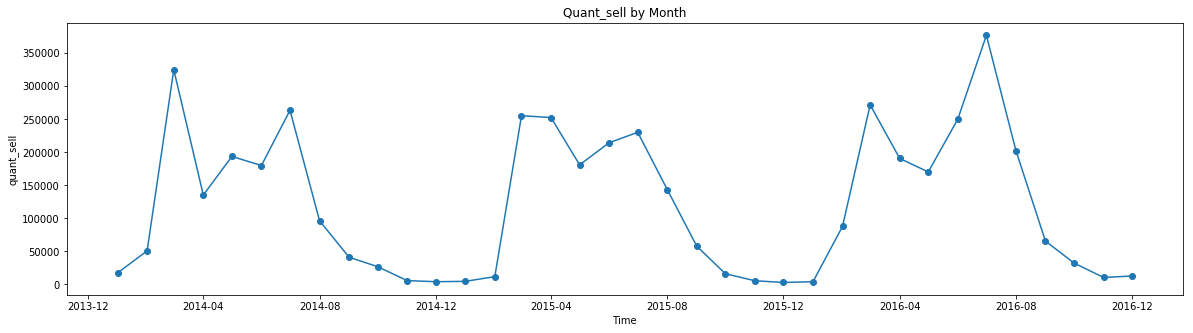

In [9]:
sale_data_bymonth['date']=sale_data_bymonth.index
l_data = []
for i in range(36):
    l_data.append(sale_data_bymonth.date[i])
xs = [datetime.strptime(d, '%Y-%m').date() for d in l_data]

fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(1,1,1)
plt.title('Quant_sell by Month')
plt.plot(xs, sale_data_bymonth.quant_sell, 'o-')
plt.xlabel('Time')
plt.ylabel('quant_sell')

In [93]:
#导入数据
whether_data = pd.read_csv("./data/whether_hangzhou.csv",encoding='gbk')  
whether_data.head()

,date,whether,temperature
0,2014-01-01,晴,16
1,2014-01-02,晴,17
2,2014-01-03,多云,16
3,2014-01-04,多云,12
4,2014-01-05,晴,12


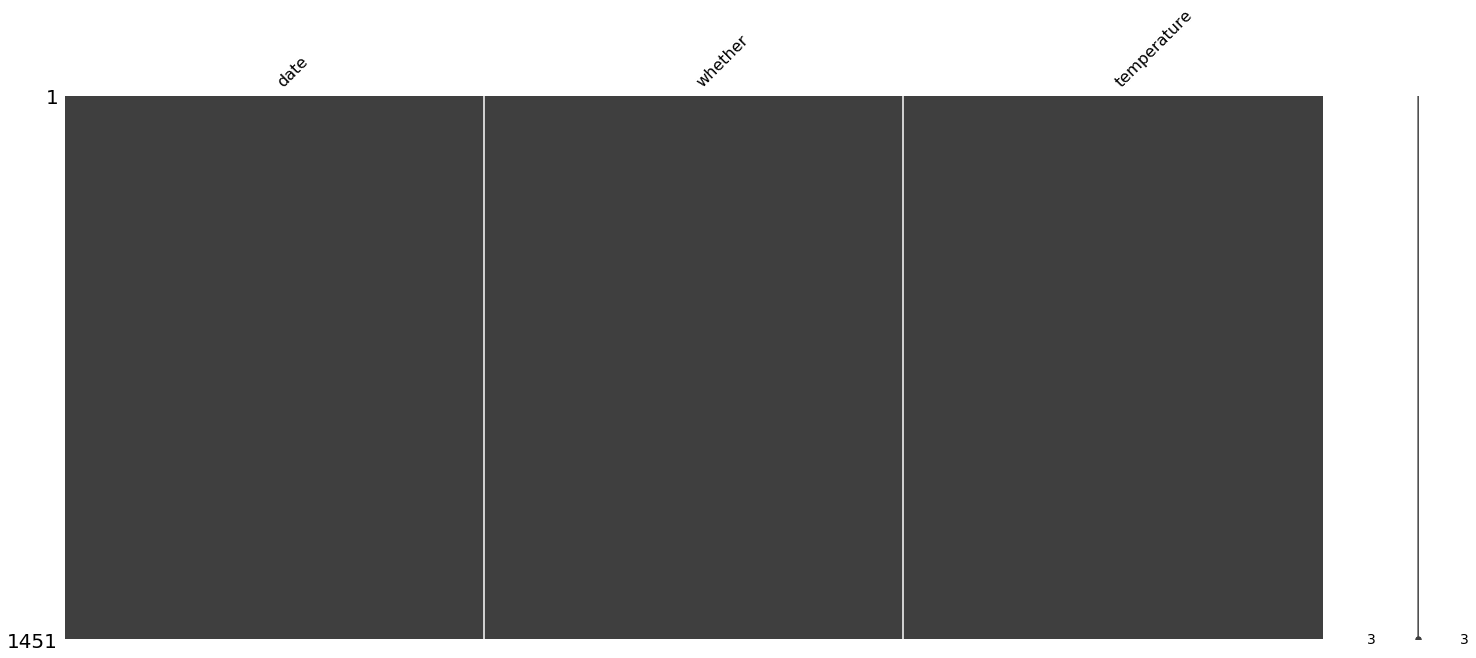

In [94]:
#查看数据是否完整
missingno.matrix(whether_data)

In [95]:
#把日期改为以月为单位
from datetime import datetime
a = []
for i in whether_data.date:
    a.append(datetime.strptime(i, '%Y-%m-%d').strftime('%Y-%m'))

In [96]:
whether_data["date_month"]=a

In [97]:
whether_data.head(10)

,date,whether,temperature,date_month
0,2014-01-01,晴,16,2014-01
1,2014-01-02,晴,17,2014-01
2,2014-01-03,多云,16,2014-01
3,2014-01-04,多云,12,2014-01
4,2014-01-05,晴,12,2014-01
5,2014-01-06,晴,14,2014-01
6,2014-01-07,小雨,11,2014-01
7,2014-01-08,小雨,8,2014-01
8,2014-01-09,多云,8,2014-01
9,2014-01-10,多云,8,2014-01


In [98]:
#天气字典
whether_type =list( whether_data.whether)
whether_vocab = list(set(whether_type))
whether_vocab.sort(key=whether_type.index) 

In [99]:
whether_vocab_token = {word: token for token, word in enumerate(whether_vocab)}
token_to_whetehr = {token: word for word, token in whether_vocab_token.items()}
print("天气字典")
whether_vocab_token

天气字典


{'中到大雨': 13,
 '中雨': 5,
 '中雪': 8,
 '多云': 1,
 '大到暴雨': 14,
 '大雨': 11,
 '大雪': 17,
 '小到中雨': 10,
 '小雨': 2,
 '小雪': 6,
 '晴': 0,
 '暴雨': 15,
 '阴': 3,
 '阵雨': 9,
 '雨夹雪': 7,
 '雷阵雨': 12,
 '雾': 16,
 '霾': 4}

### 可以看出数值越大，天气越恶劣，数值越小，天气越好

In [100]:
tokens = [whether_vocab_token.get(word) for word in (whether_data.whether)]

In [101]:
whether_data['whether']=tokens

In [102]:
whether_data.head(10)

,date,whether,temperature,date_month
0,2014-01-01,0,16,2014-01
1,2014-01-02,0,17,2014-01
2,2014-01-03,1,16,2014-01
3,2014-01-04,1,12,2014-01
4,2014-01-05,0,12,2014-01
5,2014-01-06,0,14,2014-01
6,2014-01-07,2,11,2014-01
7,2014-01-08,2,8,2014-01
8,2014-01-09,1,8,2014-01
9,2014-01-10,1,8,2014-01


### 相关量:月平均气温, 天气平均情况

In [103]:
whether_mean = whether_data.groupby(['date_month']).mean()

In [104]:
whether_mean.head()

,whether,temperature
date_month,,
2014-01,0.870968,12.000000
2014-02,2.535714,9.214286
2014-03,2.483871,17.000000
2014-04,3.666667,21.300000
2014-05,3.645161,27.225806


### 相关量：月最高气温, 天气最坏情况

In [105]:
whether_max= whether_data.groupby(['date_month']).max()

In [106]:
whether_max.head()

,date,whether,temperature
date_month,,,
2014-01,2014-01-31,4,24
2014-02,2014-02-28,8,24
2014-03,2014-03-31,9,28
2014-04,2014-04-30,9,27
2014-05,2014-05-31,10,34


### 相关量：月最低气温, 天气最坏情况

In [107]:
whether_min= whether_data.groupby(['date_month']).min()
whether_min.head()

,date,whether,temperature
date_month,,,
2014-01,2014-01-01,0,5
2014-02,2014-02-01,0,2
2014-03,2014-03-01,0,6
2014-04,2014-04-01,0,16
2014-05,2014-05-01,0,20


### 相关量：月销售最大值

In [108]:
sale_data_max = sale_data.groupby(['date_month']).max()
sale_data_max.head()

,quant_sell
date_month,
2014-01,1679
2014-02,7066
2014-03,24146
2014-04,7585
2014-05,13571


### 相关量：月销售最小值

In [26]:
sale_data_min = sale_data.groupby(['date_month']).min()
sale_data_min.head()

,quant_sell
date_month,
2014-01,2
2014-02,1
2014-03,12
2014-04,13
2014-05,19


### 相关量：月销售最小值

In [27]:
sale_data_mean = sale_data.groupby(['date_month']).mean()
sale_data_mean.head()

,quant_sell
date_month,
2014-01,298.913793
2014-02,535.673684
2014-03,3037.654206
2014-04,1264.364486
2014-05,1762.036364


### 相关量：月销售数量

In [28]:
sale_data_count = sale_data.groupby(['date_month']).count()
sale_data_count.head()

,quant_sell
date_month,
2014-01,58
2014-02,95
2014-03,107
2014-04,107
2014-05,110


In [29]:
sale_data_total = sale_data.groupby(['date_month']).sum()

In [30]:
sale_data_total.head()

,quant_sell
date_month,
2014-01,17337
2014-02,50889
2014-03,325029
2014-04,135287
2014-05,193824


In [111]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data=sale_data_total
data['avg_tem']=whether_mean.temperature
data['max_tem']=whether_max.temperature
data['min_tem']=whether_min.temperature
data['avg_whe']=whether_mean.whether
data['max_whe']=whether_max.whether
data['min_whe']=whether_min.whether
data['sell_max']=sale_data_max.quant_sell
data['sell_min']=sale_data_min.quant_sell
data['sell_mean']=sale_data_mean.quant_sell
data['sell_count']=sale_data_count.quant_sell
data.head()

,quant_sell,avg_tem,max_tem,min_tem,avg_whe,max_whe,min_whe,sell_max,sell_min,sell_mean,sell_count
date_month,,,,,,,,,,,
2014-01,17337,12.000000,24,5,0.870968,4,0,1679,2,298.913793,58
2014-02,50889,9.214286,24,2,2.535714,8,0,7066,1,535.673684,95
2014-03,325029,17.000000,28,6,2.483871,9,0,24146,12,3037.654206,107
2014-04,135287,21.300000,27,16,3.666667,9,0,7585,13,1264.364486,107
2014-05,193824,27.225806,34,20,3.645161,10,0,13571,19,1762.036364,110


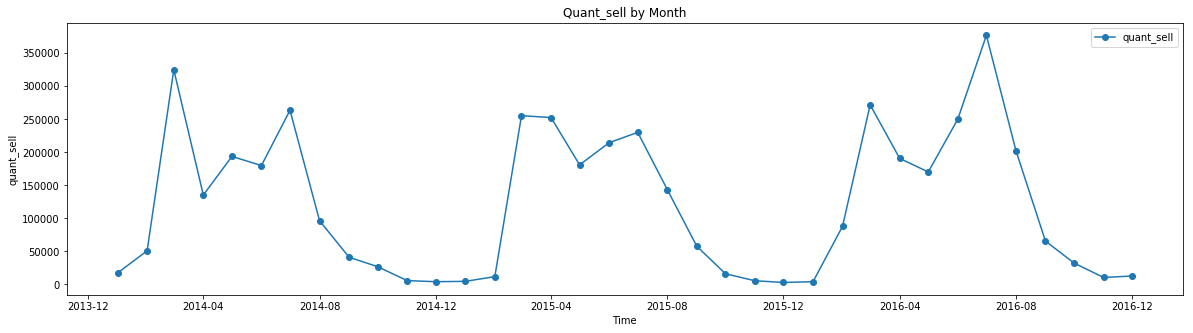

In [32]:
sale_data_bymonth['date']=sale_data_bymonth.index
l_data = []
for i in range(36):
    l_data.append(sale_data_bymonth.date[i])
xs = [datetime.strptime(d, '%Y-%m').date() for d in l_data]

fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(1,1,1)
plt.title('Quant_sell by Month')
plt.plot(xs, data.quant_sell, 'o-')
plt.xlabel('Time')
plt.ylabel('quant_sell')
plt.legend()

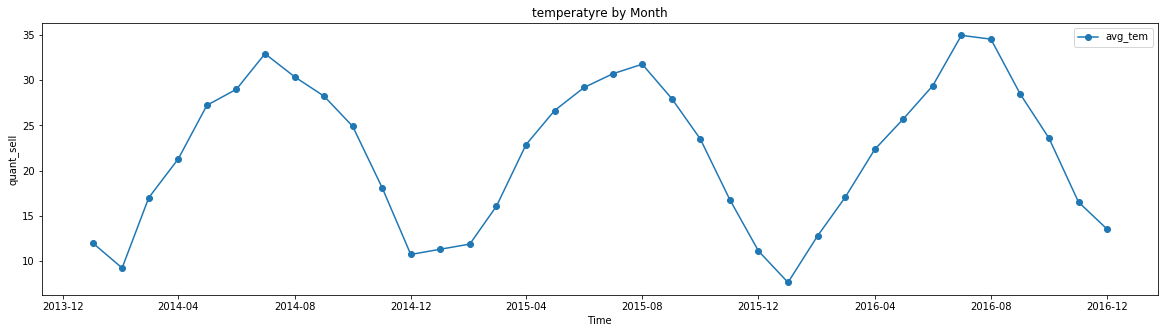

In [33]:
sale_data_bymonth['date']=sale_data_bymonth.index
l_data = []
for i in range(36):
    l_data.append(sale_data_bymonth.date[i])
xs = [datetime.strptime(d, '%Y-%m').date() for d in l_data]

fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(1,1,1)
plt.title('temperatyre by Month')
plt.plot(xs, data.avg_tem, 'o-')
plt.xlabel('Time')
plt.ylabel('quant_sell')
plt.legend()

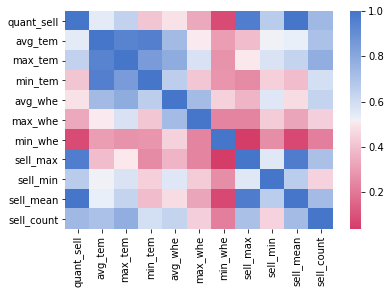

In [34]:
#查看任意两个数据的相关性
dfheat=data.corr()
cmap= sns.diverging_palette(0,255,sep=1,n=256,as_cmap=True)
sns.heatmap(dfheat,cmap=cmap)

In [35]:
data.head()

,quant_sell,avg_tem,max_tem,min_tem,avg_whe,max_whe,min_whe,sell_max,sell_min,sell_mean,sell_count
date_month,,,,,,,,,,,
2014-01,17337,12.000000,24,5,0.870968,4,0,1679,2,298.913793,58
2014-02,50889,9.214286,24,2,2.535714,8,0,7066,1,535.673684,95
2014-03,325029,17.000000,28,6,2.483871,9,0,24146,12,3037.654206,107
2014-04,135287,21.300000,27,16,3.666667,9,0,7585,13,1264.364486,107
2014-05,193824,27.225806,34,20,3.645161,10,0,13571,19,1762.036364,110


In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [76]:
X = data.loc[:,('avg_tem','max_tem','min_tem','avg_whe')]
y = data.loc[:,'quant_sell']

In [77]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

X_train.shape=(28, 4)
 y_train.shape =(28,)
 X_test.shape=(8, 4)
,  y_test.shape=(8,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-344724.1175626683
[ -609.65002012 19902.8333865  -5514.39186111 -1113.42782571]


In [78]:
y_pred = linreg.predict(X_test)
print (y_pred) 

[ 97086.36444711 263748.59168346 191484.8756783  -14488.64538251
 213508.07803789  17153.42819476 243829.87768301 144403.03648877]


RMSE by hand: 89305.635507538


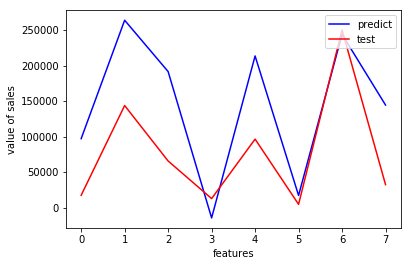

In [79]:
sum_mean=0
for i in range(len(y_pred)):
        sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/8)  
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("features")
plt.ylabel('value of sales')
plt.show()


In [113]:

data_test = whether_mean
data_test['avg_tem']=whether_mean.temperature
data_test['max_tem']=whether_max.temperature
data_test['min_tem']=whether_min.temperature
data_test['avg_whe']=whether_mean.whether


In [116]:
data_test = data_test.drop(['whether','temperature'],axis=1)

In [121]:
data_test[36:41]

,avg_tem,max_tem,min_tem,avg_whe
date_month,,,,
2017-01,10.935484,20,6,1.548387
2017-02,12.500000,21,7,1.607143
2017-03,15.064516,22,9,1.806452
2017-04,23.800000,31,13,3.433333
2017-05,28.064516,34,20,2.612903


In [126]:
data_pred = linreg.predict(data_test[36:41])
print("2017-01到2017-05的销量: {}".format(data_pred)) 

2017-01到2017-05的销量: [ 11855.36376014  25224.57769748  32313.25413753 182244.18387722
 201665.56837585]
